### Import i przegląd zbioru danych

In [38]:
import os

# Ścieżka do folderu z danymi
dataset_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11"

#  zawartość folderu głównego
print("Zawartość folderu głównego:")
print(os.listdir(dataset_path))

# Ścieżki do folderów 'train', 'valid' i 'test'
train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

#  zawartość folderów 'train', 'valid' i 'test'
print("\nZawartość folderu 'train':")
print(os.listdir(train_path))

print("\nZawartość folderu 'valid':")
print(os.listdir(valid_path))

print("\nZawartość folderu 'test':")
print(os.listdir(test_path))

#  zawartość podfolderów, np. w folderze 'train'
train_folders = os.listdir(train_path)
for folder in train_folders:
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        print(f"\nZawartość folderu '{folder}' w 'train':")
        print(os.listdir(folder_path))


valid_folders = os.listdir(valid_path)
for folder in valid_folders:
    folder_path = os.path.join(valid_path, folder)
    if os.path.isdir(folder_path):
        print(f"\nZawartość folderu '{folder}' w 'valid':")
        print(os.listdir(folder_path))

test_folders = os.listdir(test_path)
for folder in test_folders:
    folder_path = os.path.join(test_path, folder)
    if os.path.isdir(folder_path):
        print(f"\nZawartość folderu '{folder}' w 'test':")
        print(os.listdir(folder_path))


Zawartość folderu głównego:
['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']

Zawartość folderu 'train':
['images', 'labels']

Zawartość folderu 'valid':
['images', 'labels']

Zawartość folderu 'test':
['images', 'labels']

Zawartość folderu 'images' w 'train':
['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Zawartość folderu 'labels' w 'train':
['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Zawartość folderu 'images' w 'valid':
['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Zawartość folderu 'labels' w 'valid':
['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Zawartość folderu 'images' w 'test':
['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Zawartość folderu 'labels' w 'test':
['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']


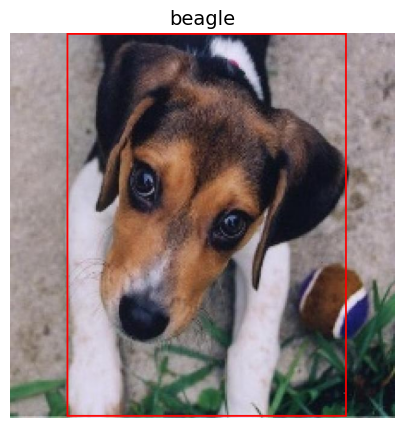

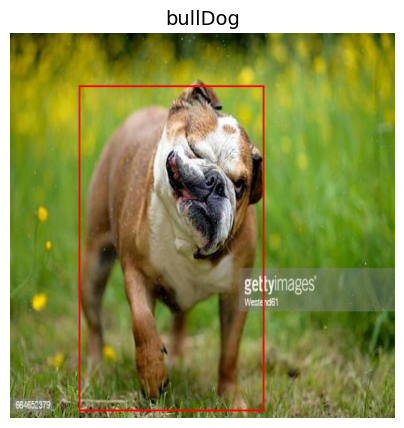

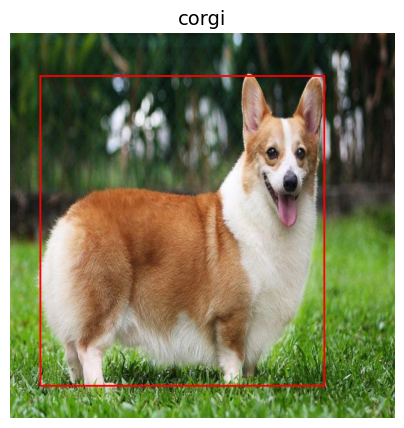

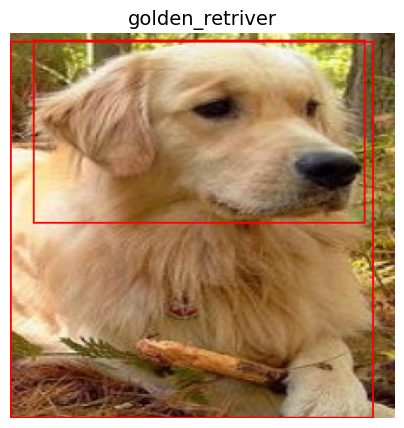

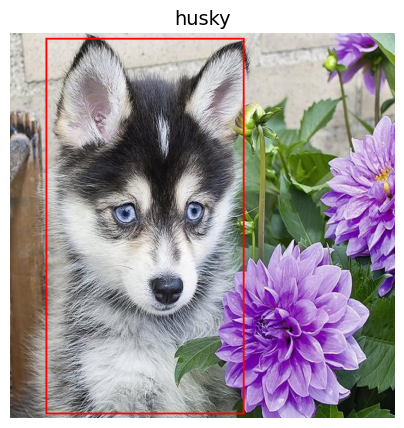

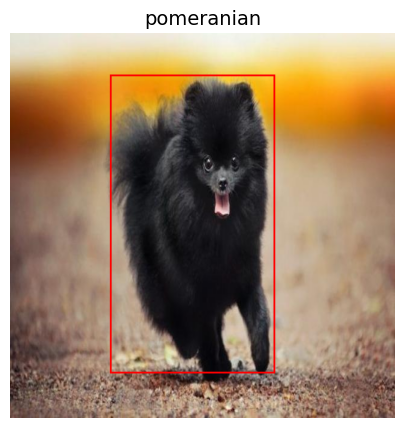

In [39]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Ścieżka do folderu z danymi
dataset_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11"
train_images_path = os.path.join(dataset_path, "train", "images")
train_labels_path = os.path.join(dataset_path, "train", "labels")

#  lista klas (podfolderów w train/images)
classes = os.listdir(train_images_path)

# Ustaw liczbę obrazów do wyświetlenia na klasę
num_images_per_class = 1

for class_name in classes:
    class_folder_images = os.path.join(train_images_path, class_name)
    class_folder_labels = os.path.join(train_labels_path, class_name)
    image_files = os.listdir(class_folder_images)[:num_images_per_class]  

    for image_file in image_files:
        image_path = os.path.join(class_folder_images, image_file)
        label_path = os.path.join(class_folder_labels, image_file.replace('.jpg', '.txt'))

    
        image = Image.open(image_path)
        draw = ImageDraw.Draw(image)

        # Jeśli istnieje odpowiadający plik etykiety, narysuj bounding boxy
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    class_id, x_center, y_center, width, height = map(float, parts)

                    # współrzędne znormalizowane na piksele
                    img_width, img_height = image.size
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height

                    #  współrzędne rogu prostokąta
                    x_min = int(x_center - width / 2)
                    y_min = int(y_center - height / 2)
                    x_max = int(x_center + width / 2)
                    y_max = int(y_center + height / 2)

                    
                    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

        # Wyświetl obraz z bounding boxami
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.title(class_name, fontsize=14)
        plt.axis("off")
        plt.show()

In [40]:
import os
from collections import Counter


def count_classes(images_path, labels_path):
    print(f"\nŚcieżka do obrazów: {images_path}")
    print(f"Ścieżka do etykiet: {labels_path}\n")

    # Liczenie obrazów w każdej klasie
    image_classes = os.listdir(images_path)
    label_classes = os.listdir(labels_path)
    
    print("Klasy (obrazy):", image_classes)
    print("Klasy (etykiety):", label_classes)
    
    # Sprawdzanie liczby obrazów i etykiet w każdej klasie
    image_counts = {cls: len(os.listdir(os.path.join(images_path, cls))) for cls in image_classes}
    label_counts = {cls: len(os.listdir(os.path.join(labels_path, cls))) for cls in label_classes}
    
    print("\nLiczba obrazów w klasach:")
    for cls, count in image_counts.items():
        print(f"{cls}: {count}")
    
    print("\nLiczba etykiet w klasach:")
    for cls, count in label_counts.items():
        print(f"{cls}: {count}")

# Sprawdzanie danych treningowych
count_classes(
    images_path=os.path.join(dataset_path, 'train', 'images'),
    labels_path=os.path.join(dataset_path, 'train', 'labels')
)

# Sprawdzanie danych walidacyjnych
count_classes(
    images_path=os.path.join(dataset_path, 'valid', 'images'),
    labels_path=os.path.join(dataset_path, 'valid', 'labels')
)

# Sprawdzanie danych testowych
count_classes(
    images_path=os.path.join(dataset_path, 'test', 'images'),
    labels_path=os.path.join(dataset_path, 'test', 'labels')
)



Ścieżka do obrazów: C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11\train\images
Ścieżka do etykiet: C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11\train\labels

Klasy (obrazy): ['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']
Klasy (etykiety): ['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Liczba obrazów w klasach:
beagle: 171
bullDog: 126
corgi: 173
golden_retriver: 177
husky: 137
pomeranian: 96

Liczba etykiet w klasach:
beagle: 171
bullDog: 126
corgi: 173
golden_retriver: 177
husky: 137
pomeranian: 96

Ścieżka do obrazów: C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11\valid\images
Ścieżka do etykiet: C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11\valid\labels

Klasy (obrazy): ['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']
Klasy (etykiety): ['beagle', 'bullDog', 'corgi', 'golden_retriver', 'husky', 'pomeranian']

Liczba obrazów w klasach:
beagle: 52
bullDog: 46
corgi: 37
golden_retriver: 54
husk

### Model 1

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ścieżki do folderów z obrazami
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')
test_images_path = os.path.join(dataset_path, 'test', 'images')

# Ścieżki do folderów z etykietami
train_labels_path = os.path.join(dataset_path, 'train', 'labels')
valid_labels_path = os.path.join(dataset_path, 'valid', 'labels')
test_labels_path = os.path.join(dataset_path, 'test', 'labels')

# Używamy ImageDataGenerator do przetwarzania obrazów
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalizacja
train_generator = train_datagen.flow_from_directory(
    train_images_path,  # Ścieżka do folderu z danymi treningowymi
    target_size=(640, 640),
    batch_size=32,
    class_mode='sparse' 
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Normalizacja
valid_generator = valid_datagen.flow_from_directory(
    valid_images_path,  
    target_size=(640, 640),
    batch_size=32,
    class_mode='sparse'
)

# Generowanie danych z folderu testowego
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator = test_datagen.flow_from_directory(
    test_images_path,  
    target_size=(640, 640),
    batch_size=32,
    class_mode='sparse'
)


Found 880 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Found 126 images belonging to 6 classes.


In [42]:
print(train_generator.class_indices)


{'beagle': 0, 'bullDog': 1, 'corgi': 2, 'golden_retriver': 3, 'husky': 4, 'pomeranian': 5}


In [43]:
from tensorflow.keras import layers, models 
# Tworzenie modelu CNN
def create_model():
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(640, 640, 3)))  # Rozmiar obrazów
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))  # Dla 6 klas
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Tworzenie modelu
model = create_model()
model.summary() 

c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 638, 638, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 317, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 158, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 156, 156, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 78, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 778752)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    99,680,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,774,406 (380.61 MB)

 Trainable params: 99,774,406 (380.61 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 178s 6s/step - accuracy: 0.2102 - loss: 11.5804 - val_accuracy: 0.3028 - val_loss: 1.7295
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.3175 - loss: 1.7134 - val_accuracy: 0.3625 - val_loss: 1.7144
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.5439 - loss: 1.5305 - val_accuracy: 0.3665 - val_loss: 1.8381
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.7739 - loss: 0.7533 - val_accuracy: 0.3705 - val_loss: 2.2528
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.9438 - loss: 0.1893 - val_accuracy: 0.3028 - val_loss: 2.7791
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.9771 - loss: 0.1245 - val_accuracy: 0.3068 - val_loss: 2.5621
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.9809 - loss: 0.0958 - val_accuracy: 0.3227 - val_loss: 3.8063
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


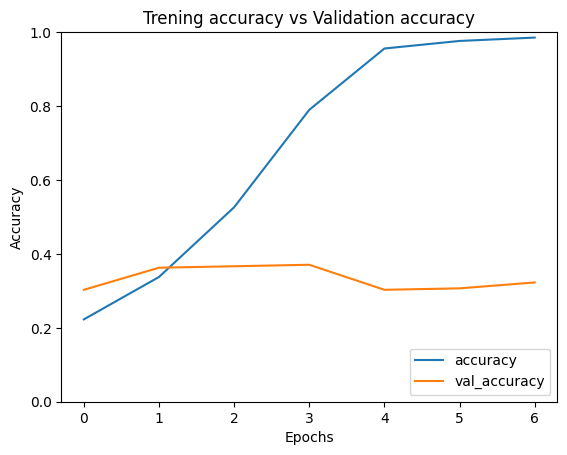

Model został zapisany do pliku 'dog_breeds_model.h5'.


In [44]:
from tensorflow.keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt
# Definiowanie EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',   # Metryka, którą monitorujemy 
    patience=3,           # Liczba epok, po których trening zostanie przerwany, jeśli nie ma poprawy
    restore_best_weights=True,  # Przywróci najlepsze wagi modelu po zakończeniu treningu
    verbose=1              # Jeśli ustawione na 1, wyświetli informacje o zatrzymaniu
)

# Trening modelu
history = model.fit(
    train_generator,
    epochs=10,  # Określamy liczbę epok
    validation_data=valid_generator,
    callbacks=[early_stopping]  # Dodaj EarlyStopping do listy callbacków
)

# Wyświetlanie wyników treningu
# Wykres treningu i walidacji
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Trening accuracy vs Validation accuracy')
plt.show()

# Zapisz model
model.save("dog_breeds_model.h5")
print("Model został zapisany do pliku 'dog_breeds_model.h5'.")

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 815ms/step


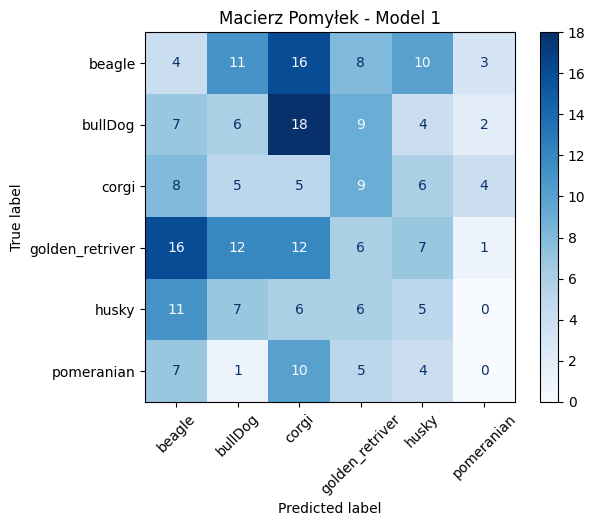

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Funkcja do generowania i wyświetlania macierzy pomyłek dla Modelu 1
def plot_confusion_matrix_for_model_1(model, generator, model_name):

    # Reset generatora, aby uniknąć problemów z wskaźnikiem batchy
    generator.reset()
    
    # Pobranie przewidywań modelu
    predictions = np.argmax(model.predict(generator, verbose=1), axis=-1)
    
    # Prawdziwe etykiety
    true_labels = generator.classes

    # Obliczenie macierzy pomyłek
    cm = confusion_matrix(true_labels, predictions)
    
    # Nazwy klas
    labels = list(generator.class_indices.keys())
    
    # Wyświetlenie macierzy pomyłek
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Macierz Pomyłek - {model_name}')
    plt.show()

# Wywołanie funkcji dla Modelu 1
plot_confusion_matrix_for_model_1(model, valid_generator, "Model 1")


Found 126 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model załadowany pomyślnie.
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step


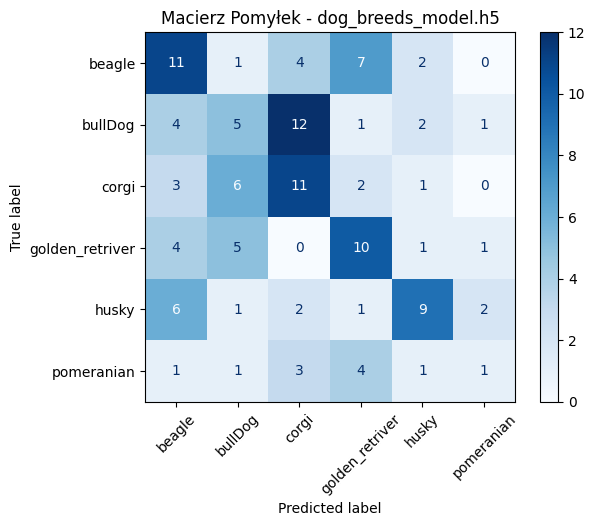

Dokładność modelu na zbiorze testowym: 37.30%


In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżki do danych testowych
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# Generowanie danych testowych
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator = test_datagen.flow_from_directory(
    test_images_path,
    target_size=(640, 640),  # Rozmiar obrazu dopasowany do modelu
    batch_size=32,
    class_mode='sparse',
    shuffle=False  
)

# Ładowanie zapisanego modelu
model = load_model("dog_breeds_model.h5")
print("Model załadowany pomyślnie.")

# Przewidywanie etykiet na zbiorze testowym
test_generator.reset()  # Reset generatora na wypadek problemów z wskaźnikiem batchy
predictions = np.argmax(model.predict(test_generator, verbose=1), axis=-1)

# Pobieranie prawdziwych etykiet
true_labels = test_generator.classes

# Wyświetlenie raportu macierzy pomyłek
cm = confusion_matrix(true_labels, predictions)
labels = list(test_generator.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - dog_breeds_model.h5")
plt.show()

# Obliczanie dokładności na zbiorze testowym
accuracy = np.sum(predictions == true_labels) / len(true_labels)
print(f"Dokładność modelu na zbiorze testowym: {accuracy:.2%}")


### Model 2

In [47]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Tworzenie modelu z Dropout (Model 2)
def create_model_2():
    model = models.Sequential()
    
    # Warstwy konwolucyjne z Dropout
    model.add(layers.InputLayer(input_shape=(640, 640, 3)))  # Rozmiar obrazów
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Dropout po pierwszej warstwie konwolucyjnej
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Dropout po drugiej warstwie konwolucyjnej
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))  # Dropout po trzeciej warstwie konwolucyjnej
    
    # Spłaszczenie i gęste warstwy
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))  # Dropout po warstwie Dense
    
    # Wyjściowa warstwa softmax dla klasyfikacji wieloklasowej
    model.add(layers.Dense(6, activation='softmax'))  # 6 klas
    
    # Kompilacja modelu
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Tworzenie modelu
model_2 = create_model_2()
model_2.summary()

c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 638, 638, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 317, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 158, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 158, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 156, 156, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 78, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 78, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 778752)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    99,680,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,774,406 (380.61 MB)

 Trainable params: 99,774,406 (380.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 171s 6s/step - accuracy: 0.1597 - loss: 13.7267 - val_accuracy: 0.1833 - val_loss: 1.7910
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.2008 - loss: 1.7901 - val_accuracy: 0.2151 - val_loss: 1.7888
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.1984 - loss: 1.7882 - val_accuracy: 0.2151 - val_loss: 1.7866
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.1992 - loss: 1.7868 - val_accuracy: 0.1992 - val_loss: 1.7854
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 166s 6s/step - accuracy: 0.1859 - loss: 1.7803 - val_accuracy: 0.1633 - val_loss: 1.7790
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.2145 - loss: 1.7745 - val_accuracy: 0.1474 - val_loss: 1.7818
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.1793 - loss: 1.7762 - val_accuracy: 0.1474 - val_loss: 1.7805
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


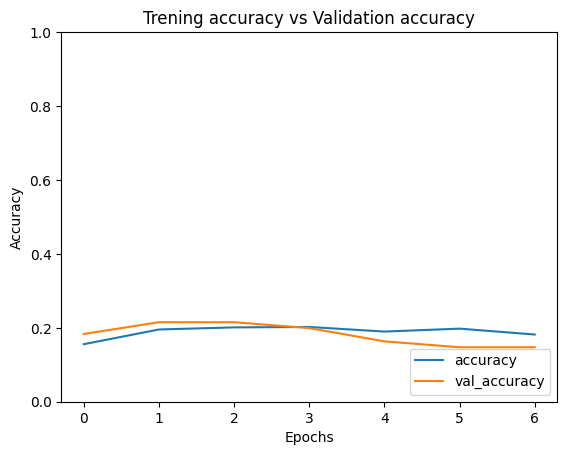

Model 2 został zapisany do pliku 'dog_breeds_model_2.h5'.


In [48]:
# Definiowanie EarlyStopping
early_stopping_2 = EarlyStopping(
    monitor='val_accuracy',  # Monitorowanie dokładności walidacyjnej
    patience=5,              # Przerwanie po 5 epokach bez poprawy
    restore_best_weights=True,  # Przywrócenie najlepszych wag modelu
    verbose=1
)

# Trening modelu
history_2 = model_2.fit(
    train_generator,
    epochs=10,  # Liczba epok
    validation_data=valid_generator,
    callbacks=[early_stopping_2]  # EarlyStopping jako callback
)

# Wizualizacja wyników treningu
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Trening accuracy vs Validation accuracy')
plt.show()

# Zapis modelu do pliku
model_2.save("dog_breeds_model_2.h5")
print("Model 2 został zapisany do pliku 'dog_breeds_model_2.h5'.")

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 820ms/step


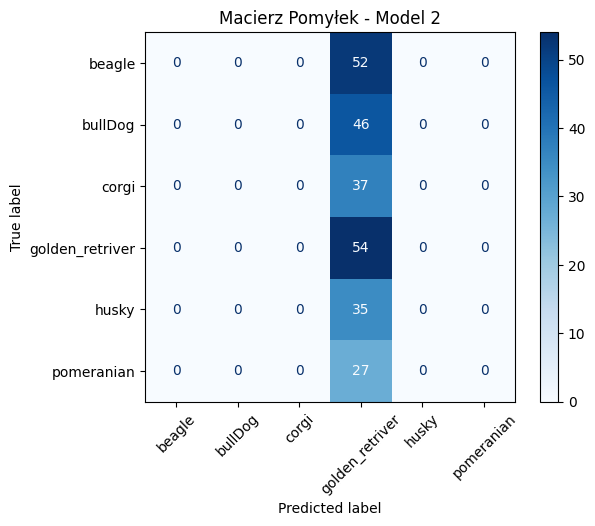

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix_for_model_2(model, generator, model_name):
  
    # Reset generatora, aby uniknąć problemów z wskaźnikiem batchy
    generator.reset()
    
    # Pobranie przewidywań modelu
    predictions = np.argmax(model.predict(generator, verbose=1), axis=-1)
    
    # Prawdziwe etykiety
    true_labels = generator.classes

    # Obliczenie macierzy pomyłek
    cm = confusion_matrix(true_labels, predictions)
    
    # Nazwy klas
    labels = list(generator.class_indices.keys())
    
    # Wyświetlenie macierzy pomyłek
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Macierz Pomyłek - {model_name}')
    plt.show()


plot_confusion_matrix_for_model_2(model_2, valid_generator, "Model 2")


Found 126 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model 2 załadowany pomyślnie.
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 845ms/step


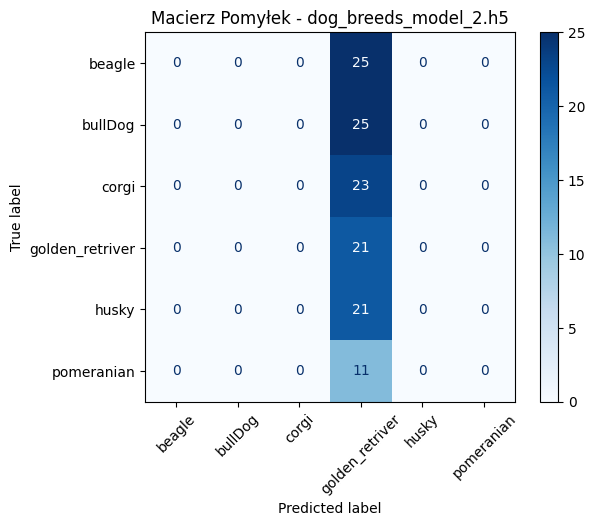

Dokładność modelu 2 na zbiorze testowym: 16.67%


In [50]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżki do danych testowych
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# Generowanie danych testowych
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator = test_datagen.flow_from_directory(
    test_images_path,
    target_size=(640, 640),  # Rozmiar obrazu dopasowany do modelu 2
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # Ważne: wyłącz shuffle, aby dopasować kolejność danych i etykiet
)


model_2 = load_model("dog_breeds_model_2.h5")
print("Model 2 załadowany pomyślnie.")

# Przewidywanie etykiet na zbiorze testowym
test_generator.reset()  # Reset generatora na wypadek problemów z wskaźnikiem batchy
predictions_2 = np.argmax(model_2.predict(test_generator, verbose=1), axis=-1)

# Pobieranie prawdziwych etykiet
true_labels = test_generator.classes

# Wyświetlenie raportu macierzy pomyłek
cm_2 = confusion_matrix(true_labels, predictions_2)
labels = list(test_generator.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - dog_breeds_model_2.h5")
plt.show()

# Obliczanie dokładności na zbiorze testowym
accuracy_2 = np.sum(predictions_2 == true_labels) / len(true_labels)
print(f"Dokładność modelu 2 na zbiorze testowym: {accuracy_2:.2%}")


### Model 3

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


def create_generators_3(train_path, valid_path, target_size=(224, 224), batch_size=32):
    # Augmentacja danych dla zbioru treningowego
    augment_train_datagen = ImageDataGenerator(
        rescale=1./255,            # Normalizacja
        rotation_range=20,         # Obrót w zakresie 20 stopni
        width_shift_range=0.2,     # Przesunięcie poziome o 20%
        height_shift_range=0.2,    # Przesunięcie pionowe o 20%
        shear_range=0.2,           # Transformacja "shear"
        zoom_range=0.2,            # Przybliżenie/oddalenie
        horizontal_flip=True,      # Odbicie poziome
        fill_mode='nearest',       # Uzupełnianie brakujących pikseli
        brightness_range=(0.8, 1.2)  # Zmienna jasność
    )

    train_generator_3 = augment_train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse' 
    )

    # Generator dla zbioru walidacyjnego
    valid_datagen_3 = ImageDataGenerator(rescale=1./255)  # Normalizacja
    valid_generator_3 = valid_datagen_3.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    return train_generator_3, valid_generator_3

In [15]:
# Funkcja do tworzenia modelu z augmentacją (Model 3)
def create_model_3(input_shape=(224, 224, 3), num_classes=6):
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),  # Dropout dla regularizacji
        layers.Dense(num_classes, activation='softmax')  
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

Found 880 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457,670 (1.75 MB)

 Trainable params: 456,710 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 577s 20s/step - accuracy: 0.2478 - loss: 1.8841 - val_accuracy: 0.2191 - val_loss: 1.7935
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 493s 18s/step - accuracy: 0.3684 - loss: 1.5889 - val_accuracy: 0.2271 - val_loss: 1.8143
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 501s 18s/step - accuracy: 0.3761 - loss: 1.5550 - val_accuracy: 0.1076 - val_loss: 1.8520
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 720s 25s/step - accuracy: 0.4392 - loss: 1.4522 - val_accuracy: 0.1076 - val_loss: 1.9187
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 685s 25s/step - accuracy: 0.4294 - loss: 1.4681 - val_accuracy: 0.1076 - val_loss: 2.0036
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 627s 23s/step - accuracy: 0.4522 - loss: 1.4394 - val_accuracy: 0.1076 - val_loss: 2.0446
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 629s 22s/step - accuracy: 0.4574 - loss: 1.4175 - val_accuracy: 0.1076 - val_loss: 2.1163
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


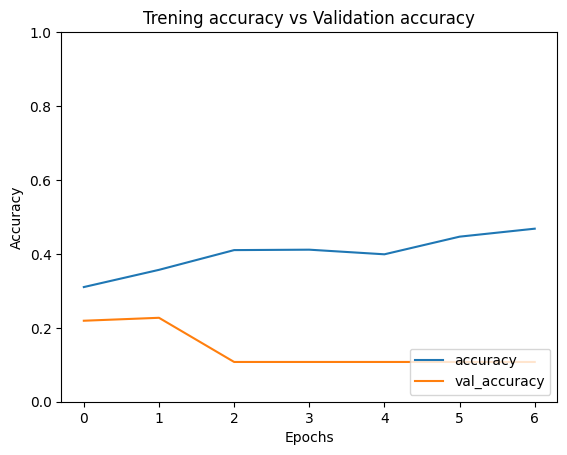

Model 3 został zapisany do pliku 'dog_breeds_model_3.h5'.


In [16]:
# Ścieżki do zbiorów danych
train_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/train/images"
valid_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/valid/images"

# Tworzenie generatorów z augmentacją
train_generator_3, valid_generator_3 = create_generators_3(train_path, valid_path, target_size=(224, 224))

# Tworzenie modelu
model_3 = create_model_3(input_shape=(224, 224, 3), num_classes=6)
model_3.summary()

# Definiowanie EarlyStopping
early_stopping_3 = EarlyStopping(
    monitor='val_accuracy', 
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Trening modelu
history_3 = model_3.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[early_stopping_3]
)

# Wizualizacja wyników treningu
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Trening accuracy vs Validation accuracy')
plt.show()

# Zapis modelu do pliku
model_3.save("dog_breeds_model_3.h5")
print("Model 3 został zapisany do pliku 'dog_breeds_model_3.h5'.")

c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step


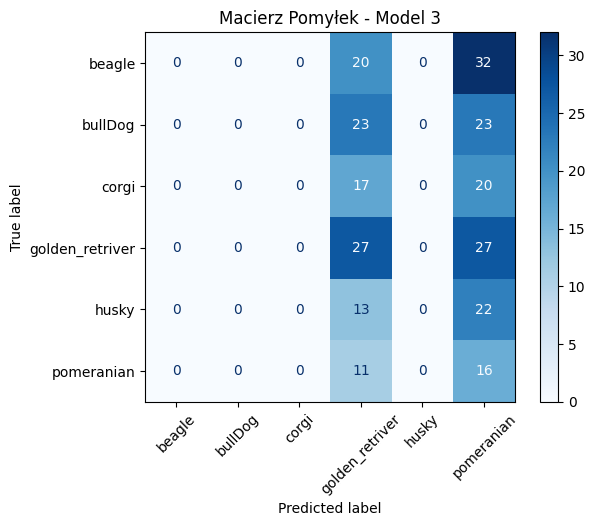

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Funkcja do generowania i wyświetlania macierzy pomyłek dla Modelu 3
def plot_confusion_matrix_for_model_3(model, generator, model_name):
    # Reset generatora, aby uniknąć problemów z wskaźnikiem batchy
    generator.reset()
    
    # Pobranie przewidywań modelu
    predictions = np.argmax(model.predict(generator, verbose=1), axis=-1)
    
    # Prawdziwe etykiety
    true_labels = generator.classes

    # Obliczenie macierzy pomyłek
    cm = confusion_matrix(true_labels, predictions)
    
    # Nazwy klas
    labels = list(generator.class_indices.keys())
    
    # Wyświetlenie macierzy pomyłek
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Macierz Pomyłek - {model_name}')
    plt.show()

# Wywołanie funkcji dla Modelu 3
plot_confusion_matrix_for_model_3(model_3, valid_generator_3, "Model 3")


Found 126 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model 3 załadowany pomyślnie.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


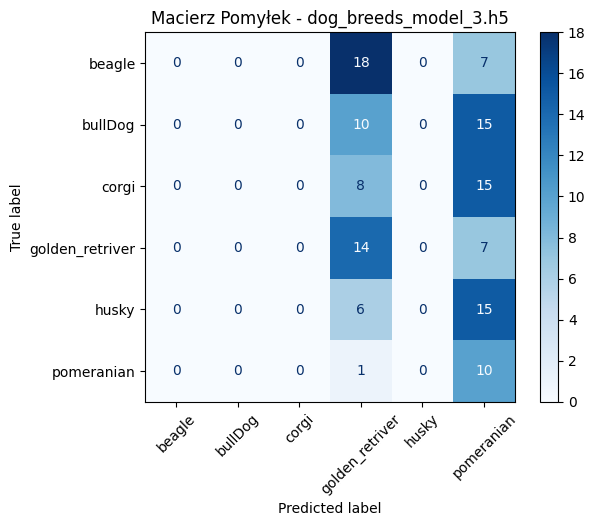

Dokładność modelu 3 na zbiorze testowym: 19.05%


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżki do danych testowych
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# Generowanie danych testowych
test_datagen_3 = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator_3 = test_datagen_3.flow_from_directory(
    test_images_path,
    target_size=(224, 224),  # Rozmiar obrazu dopasowany do modelu 3
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # Wyłącz shuffle, aby dopasować kolejność danych i etykiet
)

# Ładowanie zapisanego modelu 3
model_3 = load_model("dog_breeds_model_3.h5")
print("Model 3 załadowany pomyślnie.")

# Przewidywanie etykiet na zbiorze testowym
test_generator_3.reset()  # Reset generatora na wypadek problemów z wskaźnikiem batchy
predictions_3 = np.argmax(model_3.predict(test_generator_3, verbose=1), axis=-1)

# Pobieranie prawdziwych etykiet
true_labels_3 = test_generator_3.classes

# Wyświetlenie raportu macierzy pomyłek
cm_3 = confusion_matrix(true_labels_3, predictions_3)
labels_3 = list(test_generator_3.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=labels_3)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - dog_breeds_model_3.h5")
plt.show()

# Obliczanie dokładności na zbiorze testowym
accuracy_3 = np.sum(predictions_3 == true_labels_3) / len(true_labels_3)
print(f"Dokładność modelu 3 na zbiorze testowym: {accuracy_3:.2%}")


### Model 4

Found 880 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 660ms/step - accuracy: 0.1964 - loss: 5.6355 - val_accuracy: 0.2151 - val_loss: 1.6927
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 626ms/step - accuracy: 0.2475 - loss: 1.7435 - val_accuracy: 0.2590 - val_loss: 1.7499
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 621ms/step - accuracy: 0.2977 - loss: 1.7069 - val_accuracy: 0.3227 - val_loss: 1.6115
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 613ms/step - accuracy: 0.3123 - loss: 1.6408 - val_accuracy: 0.3785 - val_loss: 1.4895
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 614ms/step - accuracy: 0.3652 - loss: 1.6095 - val_accuracy: 0.4104 - val_loss: 1.4746
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 617ms/step - accuracy: 0.3252 - loss: 1.5962 - val_accuracy: 0.4422 - val_loss: 1.4666
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 613ms/step - accuracy: 0.3265 - loss: 1.5801 - val_accuracy: 0.4542 - val_loss: 1.4848
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 613ms/step - accuracy: 0.4042 - loss: 1.4981 - val_accu

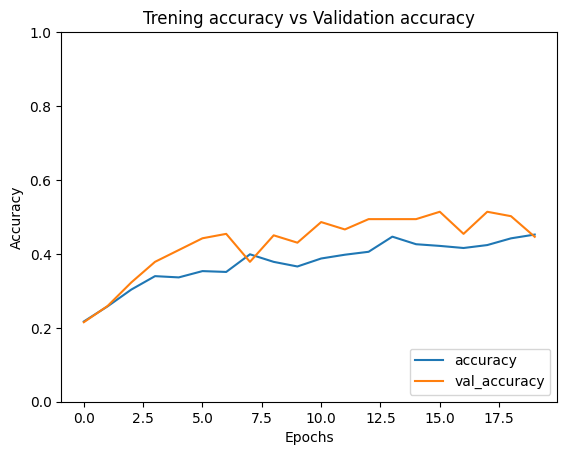

Model 4 został zapisany do pliku 'dog_breeds_model_4.h5'.


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Funkcja do tworzenia generatora danych
def create_generators_4(train_path, valid_path, target_size=(224, 224), batch_size=32):
    """
    Tworzy generatory danych dla zbiorów treningowych i walidacyjnych.
    """
    # Augmentacja dla treningu
    train_datagen_4 = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator_4 = train_datagen_4.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    # Normalizacja dla walidacji
    valid_datagen_4 = ImageDataGenerator(rescale=1./255)

    valid_generator_4 = valid_datagen_4.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    return train_generator_4, valid_generator_4

# Funkcja do tworzenia prostego modelu (Model 4)
def create_model_4(input_shape=(224, 224, 3), num_classes=6):
    """
    Tworzy prosty model CNN.
    """
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),  # Dropout dla regularizacji
        layers.Dense(num_classes, activation='softmax')  # Warstwa wyjściowa
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),  # Wyższy learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Ścieżki do zbiorów danych
train_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/train/images"
valid_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/valid/images"

# Tworzenie generatorów danych
train_generator_4, valid_generator_4 = create_generators_4(train_path, valid_path, target_size=(224, 224))

# Tworzenie prostego modelu
model_4 = create_model_4(input_shape=(224, 224, 3), num_classes=6)
model_4.summary()

# Trening modelu bez EarlyStopping
history_4 = model_4.fit(
    train_generator_4,
    epochs=20,  # Trenujemy przez 20 epok
    validation_data=valid_generator_4
)

# Wizualizacja wyników treningu
plt.plot(history_4.history['accuracy'], label='accuracy')
plt.plot(history_4.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Trening accuracy vs Validation accuracy')
plt.show()

# Zapisz model do pliku
model_4.save("dog_breeds_model_4.h5")
print("Model 4 został zapisany do pliku 'dog_breeds_model_4.h5'.")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


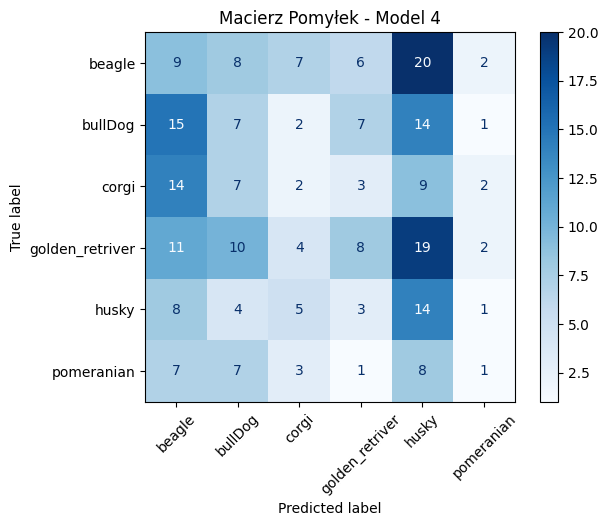

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix_for_model_4(model, generator, model_name):
    # Reset generatora, aby uniknąć problemów z wskaźnikiem batchy
    generator.reset()
    
    # Pobranie przewidywań modelu
    predictions = np.argmax(model.predict(generator, verbose=1), axis=-1)
    
    # Prawdziwe etykiety
    true_labels = generator.classes

    # Obliczenie macierzy pomyłek
    cm = confusion_matrix(true_labels, predictions)
    
    # Nazwy klas
    labels = list(generator.class_indices.keys())
    
    # Wyświetlenie macierzy pomyłek
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Macierz Pomyłek - {model_name}')
    plt.show()

# Wywołanie funkcji dla Modelu 4
plot_confusion_matrix_for_model_4(model_4, valid_generator_4, "Model 4")


Found 126 images belonging to 6 classes.


Model 4 załadowany pomyślnie.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


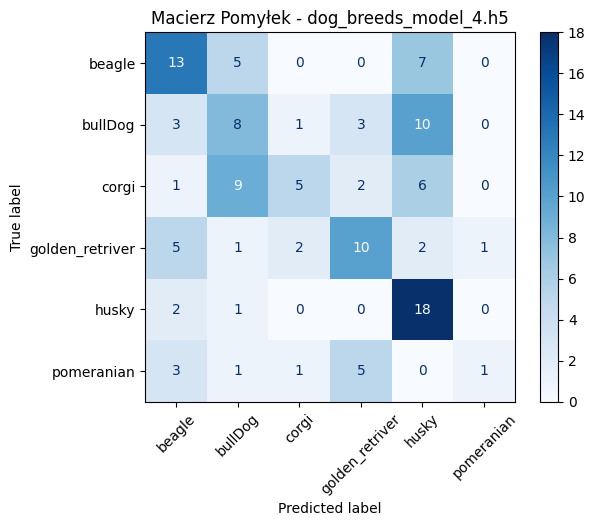

Dokładność modelu 4 na zbiorze testowym: 43.65%


In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżka do danych testowych
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# Generowanie danych testowych
test_datagen_4 = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator_4 = test_datagen_4.flow_from_directory(
    test_images_path,
    target_size=(224, 224),  # Rozmiar obrazów dopasowany do Modelu 4
    batch_size=32,
    class_mode='sparse',
    shuffle=False  
)

# Ładowanie zapisanego modelu 4
model_4 = load_model("dog_breeds_model_4.h5")
print("Model 4 załadowany pomyślnie.")

# Przewidywanie etykiet na zbiorze testowym
test_generator_4.reset()  # Reset generatora na wypadek problemów z wskaźnikiem batchy
predictions_4 = np.argmax(model_4.predict(test_generator_4, verbose=1), axis=-1)

# Pobieranie prawdziwych etykiet
true_labels_4 = test_generator_4.classes

# Wyświetlenie raportu macierzy pomyłek
cm_4 = confusion_matrix(true_labels_4, predictions_4)
labels_4 = list(test_generator_4.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm_4, display_labels=labels_4)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - dog_breeds_model_4.h5")
plt.show()

# Obliczanie dokładności na zbiorze testowym
accuracy_4 = np.sum(predictions_4 == true_labels_4) / len(true_labels_4)
print(f"Dokładność modelu 4 na zbiorze testowym: {accuracy_4:.2%}")


### Model 5

Found 880 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 651ms/step - accuracy: 0.1691 - loss: 3.9362 - val_accuracy: 0.2112 - val_loss: 1.7021
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 639ms/step - accuracy: 0.2047 - loss: 1.7579 - val_accuracy: 0.3307 - val_loss: 1.6539
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 638ms/step - accuracy: 0.3051 - loss: 1.6885 - val_accuracy: 0.4024 - val_loss: 1.5235
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 639ms/step - accuracy: 0.2945 - loss: 1.6798 - val_accuracy: 0.4223 - val_loss: 1.4870
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 628ms/step - accuracy: 0.3480 - loss: 1.5961 - val_accuracy: 0.4422 - val_loss: 1.5128
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 622ms/step - accuracy: 0.3507 - loss: 1.5610 - val_accuracy: 0.4542 - val_loss: 1.4455
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 627ms/step - accuracy: 0.4021 - loss: 1.5229 - val_accuracy: 0.4622 - val_loss: 1.4302
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 626ms/step - accuracy: 0.3713 - loss: 1.5369 - val_accu

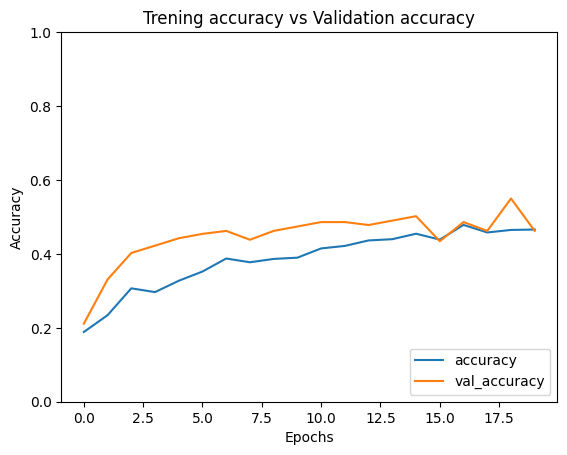

Model 5 został zapisany do pliku 'dog_breeds_model_5.h5'.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Funkcja do tworzenia generatora danych dla Modelu 5
def create_generators_5(train_path, valid_path, target_size=(224, 224), batch_size=32):
    """
    Tworzy generatory danych dla zbiorów treningowych i walidacyjnych.
    """
    # Augmentacja dla treningu
    train_datagen_5 = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator_5 = train_datagen_5.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    # Normalizacja dla walidacji
    valid_datagen_5 = ImageDataGenerator(rescale=1./255)

    valid_generator_5 = valid_datagen_5.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    return train_generator_5, valid_generator_5

# Funkcja do tworzenia modelu dla Modelu 5
def create_model_5(input_shape=(224, 224, 3), num_classes=6):
    """
    Tworzy prosty model CNN.
    """
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),  # Dropout dla regularizacji
        layers.Dense(num_classes, activation='softmax')  # Warstwa wyjściowa
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),  
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Ścieżki do zbiorów danych
train_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/train/images"
valid_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/valid/images"

# Tworzenie generatorów danych dla Modelu 5
train_generator_5, valid_generator_5 = create_generators_5(train_path, valid_path, target_size=(224, 224))

# Tworzenie modelu dla Modelu 5
model_5 = create_model_5(input_shape=(224, 224, 3), num_classes=6)
model_5.summary()

# Definiowanie EarlyStopping
early_stopping_5 = EarlyStopping(
    monitor='val_accuracy',  # Monitorujemy dokładność walidacyjną
    patience=5,              # Przerwij trening po 5 epokach bez poprawy
    restore_best_weights=True,  # Przywróć najlepsze wagi modelu po zakończeniu treningu
    verbose=1                # Wyświetl informacje o zatrzymaniu
)

# Trening modelu z EarlyStopping
history_5 = model_5.fit(
    train_generator_5,
    epochs=20,  
    validation_data=valid_generator_5,
    callbacks=[early_stopping_5]
)

# Wizualizacja wyników treningu
plt.plot(history_5.history['accuracy'], label='accuracy')
plt.plot(history_5.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Trening accuracy vs Validation accuracy')
plt.show()

# Zapisz model do pliku
model_5.save("dog_breeds_model_5.h5")
print("Model 5 został zapisany do pliku 'dog_breeds_model_5.h5'.")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


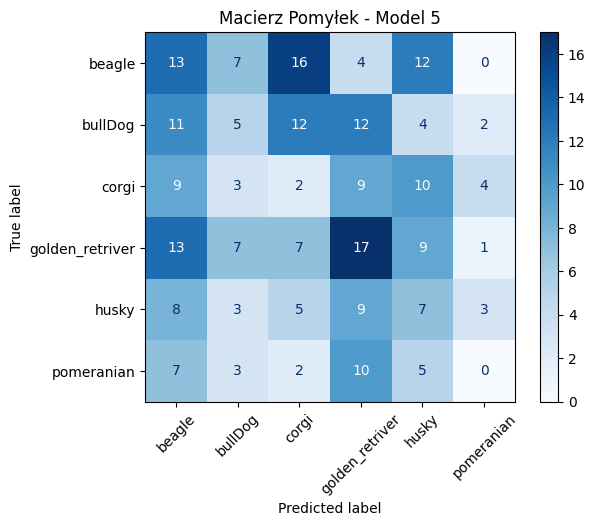

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Funkcja do generowania i wyświetlania macierzy pomyłek dla Modelu 5
def plot_confusion_matrix_for_model_5(model, generator, model_name):
    # Reset generatora, aby uniknąć problemów z wskaźnikiem batchy
    generator.reset()
    
    # Pobranie przewidywań modelu
    predictions = np.argmax(model.predict(generator, verbose=1), axis=-1)
    
    # Prawdziwe etykiety
    true_labels = generator.classes

    # Obliczenie macierzy pomyłek
    cm = confusion_matrix(true_labels, predictions)
    
    # Nazwy klas
    labels = list(generator.class_indices.keys())
    
    # Wyświetlenie macierzy pomyłek
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'Macierz Pomyłek - {model_name}')
    plt.show()

# Wywołanie funkcji dla Modelu 5
plot_confusion_matrix_for_model_5(model_5, valid_generator_5, "Model 5")


Found 126 images belonging to 6 classes.


Model 5 załadowany pomyślnie.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


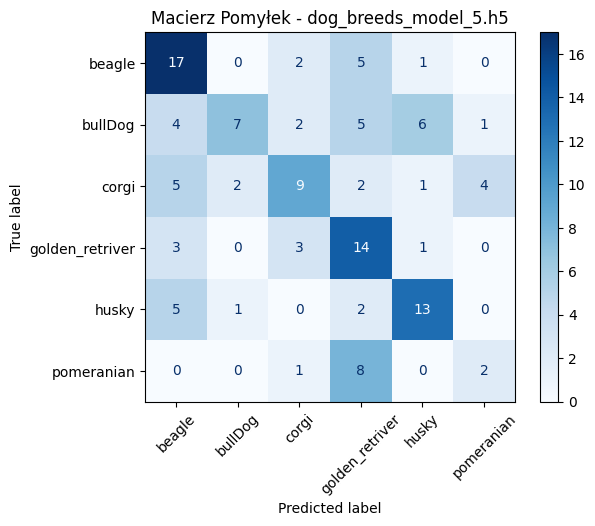

Dokładność modelu 5 na zbiorze testowym: 49.21%


In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżka do danych testowych
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# Generowanie danych testowych
test_datagen_5 = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator_5 = test_datagen_5.flow_from_directory(
    test_images_path,
    target_size=(224, 224),  # Rozmiar obrazów dopasowany do Modelu 5
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # Ważne: wyłącz shuffle, aby dopasować kolejność danych i etykiet
)

# Ładowanie zapisanego modelu 5
model_5 = load_model("dog_breeds_model_5.h5")
print("Model 5 załadowany pomyślnie.")

# Przewidywanie etykiet na zbiorze testowym
test_generator_5.reset()  # Reset generatora na wypadek problemów z wskaźnikiem batchy
predictions_5 = np.argmax(model_5.predict(test_generator_5, verbose=1), axis=-1)

# Pobieranie prawdziwych etykiet
true_labels_5 = test_generator_5.classes

# Wyświetlenie raportu macierzy pomyłek
cm_5 = confusion_matrix(true_labels_5, predictions_5)
labels_5 = list(test_generator_5.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=labels_5)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - dog_breeds_model_5.h5")
plt.show()

# Obliczanie dokładności na zbiorze testowym
accuracy_5 = np.sum(predictions_5 == true_labels_5) / len(true_labels_5)
print(f"Dokładność modelu 5 na zbiorze testowym: {accuracy_5:.2%}")


### ResNet

Found 880 images belonging to 2 classes.
Found 251 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3368 - loss: 1.6093 - val_accuracy: 0.2072 - val_loss: 4.3654
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 1.0000 - loss: 0.0401 - val_accuracy: 0.2072 - val_loss: 5.5151
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.2072 - val_loss: 6.1290
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.2072 - val_loss: 6.6520
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.2072 - val_loss: 7.1925
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.2072 - val_loss: 7.5594
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.2072 - val_loss: 7.9229
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.2072 - val_loss:

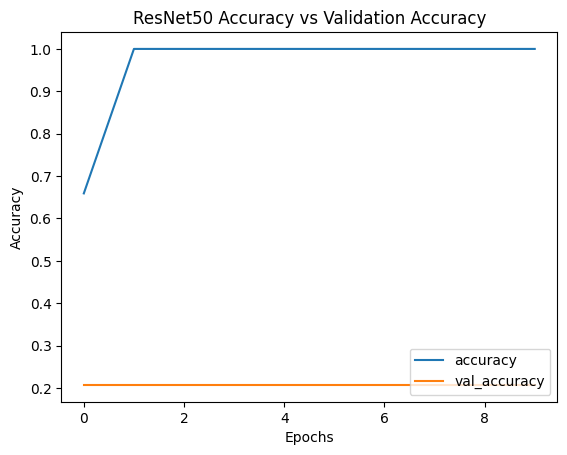

Model ResNet50 został zapisany do pliku 'resnet50_dog_breeds.h5'.


In [60]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Funkcja do tworzenia generatorów danych dla ResNet
def create_generators_resnet(train_path, valid_path, target_size=(224, 224), batch_size=32):
    """
    Tworzy generatory danych dla zbiorów treningowych i walidacyjnych dla ResNet50.
    """
    train_datagen_resnet = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator_resnet = train_datagen_resnet.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    valid_datagen_resnet = ImageDataGenerator(rescale=1./255)

    valid_generator_resnet = valid_datagen_resnet.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    return train_generator_resnet, valid_generator_resnet

# Pobieranie modelu ResNet50 z wagami ImageNet i bez warstwy wyjściowej
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Zamrożenie warstw ResNet50
base_model.trainable = False

# Budowanie nowego modelu z wykorzystaniem ResNet50
model_resnet = Sequential([
    base_model,  # Użycie przedtrenowanego modelu jako ekstraktora cech
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Regularizacja
    Dense(6, activation='softmax')  # Warstwa wyjściowa dla 6 klas
])

# Kompilacja modelu
model_resnet.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Tworzenie generatorów danych dla ResNet50
train_generator_resnet, valid_generator_resnet = create_generators_resnet(
    train_path, valid_path, target_size=(224, 224)
)

# Trening modelu ResNet50
history_resnet = model_resnet.fit(
    train_generator_resnet,
    epochs=10,
    validation_data=valid_generator_resnet
)

# Wizualizacja wyników
plt.plot(history_resnet.history['accuracy'], label='accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('ResNet50 Accuracy vs Validation Accuracy')
plt.show()

# Zapis modelu
model_resnet.save("resnet50_dog_breeds.h5")
print("Model ResNet50 został zapisany do pliku 'resnet50_dog_breeds.h5'.")



8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


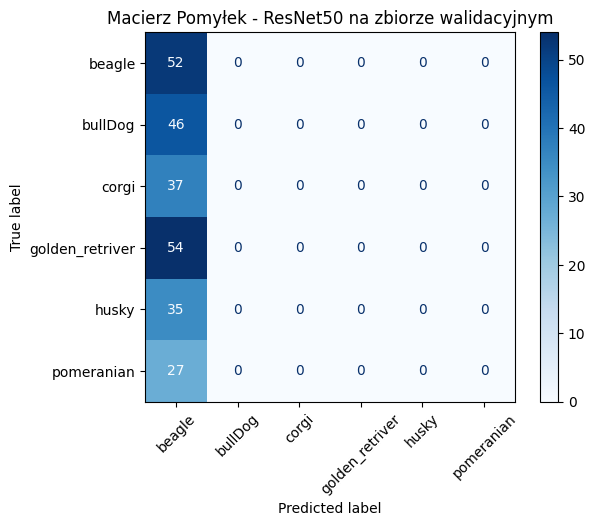

Dokładność modelu ResNet50 na zbiorze walidacyjnym: 20.72%


In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Reset generatora walidacyjnego, aby zacząć od pierwszego obrazu
valid_generator.reset()

# Przewidywanie etykiet na zbiorze walidacyjnym
predictions = np.argmax(model_resnet.predict(valid_generator, verbose=1), axis=-1)

# Pobranie prawdziwych etykiet
true_labels = valid_generator.classes

# Obliczenie macierzy pomyłek
cm = confusion_matrix(true_labels, predictions)
labels = list(valid_generator.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - ResNet50 na zbiorze walidacyjnym")
plt.show()

# Obliczanie dokładności na zbiorze walidacyjnym
accuracy = np.sum(predictions == true_labels) / len(true_labels)
print(f"Dokładność modelu ResNet50 na zbiorze walidacyjnym: {accuracy:.2%}")


Found 126 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model ResNet50 załadowany pomyślnie (test).
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step  


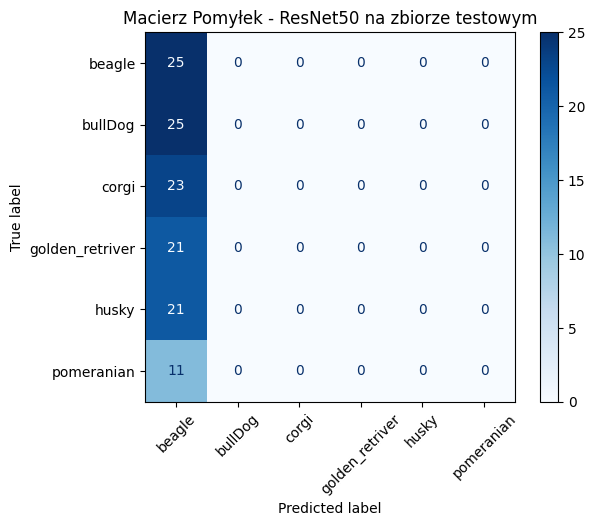

Dokładność modelu ResNet50 na zbiorze testowym: 19.84%


In [62]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżka do zbioru testowego
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# Generator testowy
test_datagen_resnet = ImageDataGenerator(rescale=1./255)
test_generator_resnet = test_datagen_resnet.flow_from_directory(
    test_images_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Ładowanie zapisanego modelu
model_resnet_test = load_model("resnet50_dog_breeds.h5")
print("Model ResNet50 załadowany pomyślnie (test).")

# Przewidywanie etykiet na zbiorze testowym
test_generator_resnet.reset()
predictions_resnet = np.argmax(model_resnet_test.predict(test_generator_resnet, verbose=1), axis=-1)

# Pobranie prawdziwych etykiet
true_labels_resnet = test_generator_resnet.classes

# Obliczenie macierzy pomyłek
cm_resnet = confusion_matrix(true_labels_resnet, predictions_resnet)
labels_resnet = list(test_generator_resnet.class_indices.keys())

# Wyświetlenie macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm_resnet, display_labels=labels_resnet)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - ResNet50 na zbiorze testowym")
plt.show()

# Obliczanie dokładności na zbiorze testowym
accuracy_resnet = np.sum(predictions_resnet == true_labels_resnet) / len(true_labels_resnet)
print(f"Dokładność modelu ResNet50 na zbiorze testowym: {accuracy_resnet:.2%}")


### VGG

Found 880 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.1836 - loss: 1.9165 - val_accuracy: 0.2510 - val_loss: 1.7411
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.2062 - loss: 1.7764 - val_accuracy: 0.2948 - val_loss: 1.6952
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.2513 - loss: 1.7429 - val_accuracy: 0.3466 - val_loss: 1.6435
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.3101 - loss: 1.6681 - val_accuracy: 0.4542 - val_loss: 1.5846
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.3120 - loss: 1.6513 - val_accuracy: 0.4422 - val_loss: 1.5439
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.3185 - loss: 1.6293 - val_accuracy: 0.4781 - val_loss: 1.4989
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.3783 - loss: 1.5885 - val_accuracy: 0.4980 - val_loss: 1.4555
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.4080 - loss: 1.5360 - val_accuracy: 0.5498 - val_loss:

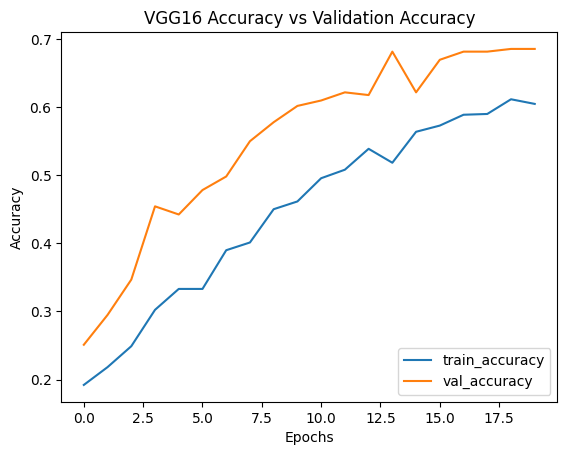

Model VGG16 został zapisany do pliku 'vgg16_dog_breeds.h5'.


In [67]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- Funkcja do tworzenia generatorów dla VGG16 ---
def create_generators_vgg(train_path, valid_path, target_size=(224, 224), batch_size=32):
    """
    Tworzy generatory danych dedykowane dla modelu VGG16.
    """
    # Generator treningowy z augmentacją
    train_datagen_vgg = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator_vgg = train_datagen_vgg.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    # Generator walidacyjny (tylko normalizacja)
    valid_datagen_vgg = ImageDataGenerator(rescale=1./255)

    valid_generator_vgg = valid_datagen_vgg.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse',
         shuffle=False
    )

    return train_generator_vgg, valid_generator_vgg


# --- Ścieżki do zbioru treningowego i walidacyjnego ---
train_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/train/images"
valid_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/valid/images"

# Tworzenie generatorów danych dla VGG16
train_generator_vgg, valid_generator_vgg = create_generators_vgg(
    train_path, 
    valid_path, 
    target_size=(224, 224), 
    batch_size=32
)

# --- Budowanie modelu VGG16 ---
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg.trainable = False  # Zamrożenie wag w warstwach VGG16

model_vgg = Sequential([
    base_model_vgg,  # Przedtrenowany VGG16 jako ekstraktor cech
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 klas wyjściowych
])

model_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Trening modelu ---
history_vgg = model_vgg.fit(
    train_generator_vgg,
    epochs=20,  
    validation_data=valid_generator_vgg
)

# --- Wizualizacja wyników treningu ---
plt.plot(history_vgg.history['accuracy'], label='train_accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('VGG16 Accuracy vs Validation Accuracy')
plt.show()

# --- Zapis modelu ---
model_vgg.save("vgg16_dog_breeds.h5")
print("Model VGG16 został zapisany do pliku 'vgg16_dog_breeds.h5'.")

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step


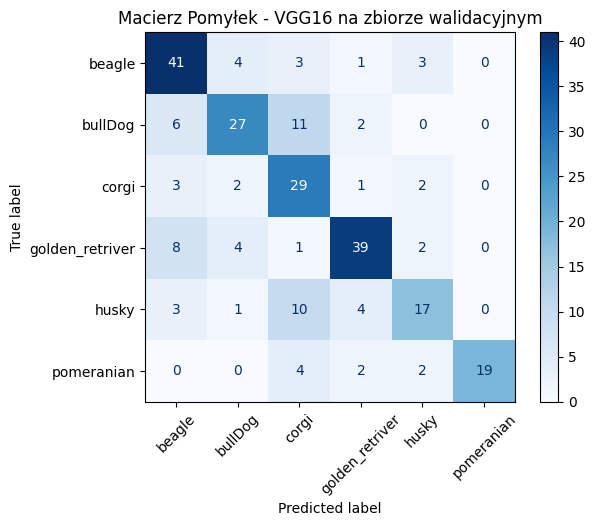

Dokładność modelu VGG16 na zbiorze walidacyjnym: 68.53%


In [68]:
valid_generator_vgg.reset()
predictions_valid_vgg = np.argmax(model_vgg.predict(valid_generator_vgg, verbose=1), axis=-1)
true_labels_valid_vgg = valid_generator_vgg.classes

cm_valid_vgg = confusion_matrix(true_labels_valid_vgg, predictions_valid_vgg)
labels_valid_vgg = list(valid_generator_vgg.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm_valid_vgg, display_labels=labels_valid_vgg)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - VGG16 na zbiorze walidacyjnym")
plt.show()

# Obliczanie dokładności na zbiorze walidacyjnym
accuracy_valid_vgg = np.sum(predictions_valid_vgg == true_labels_valid_vgg) / len(true_labels_valid_vgg)
print(f"Dokładność modelu VGG16 na zbiorze walidacyjnym: {accuracy_valid_vgg:.2%}")

Found 126 images belonging to 6 classes.


Model VGG16 został pomyślnie załadowany (test).


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


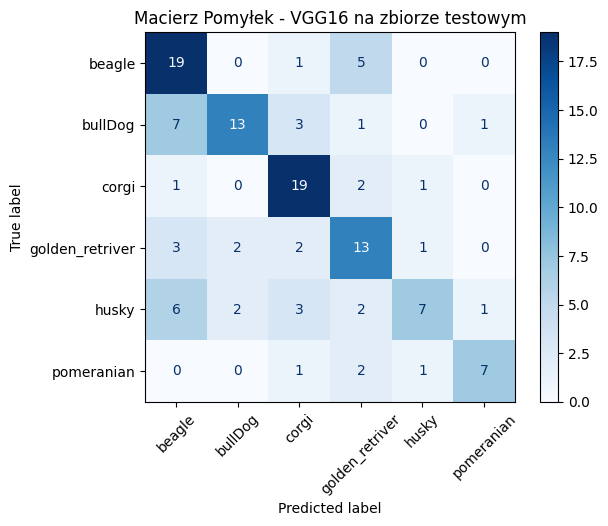

Dokładność modelu VGG16 na zbiorze testowym: 61.90%


In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ścieżka do zbioru testowego
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# --- Generator testowy ---
test_datagen_vgg = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator_vgg = test_datagen_vgg.flow_from_directory(
    test_images_path,
    target_size=(224, 224),  # Rozmiar obrazu dostosowany do VGG16
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # Ważne: wyłącz shuffle, aby zachować kolejność danych
)

# --- Ładowanie zapisanego modelu VGG16 ---
model_vgg_test = load_model("vgg16_dog_breeds.h5")
print("Model VGG16 został pomyślnie załadowany (test).")

# --- Przewidywanie etykiet na zbiorze testowym ---
test_generator_vgg.reset()  # Reset generatora, aby rozpocząć od początku
predictions_vgg = np.argmax(model_vgg_test.predict(test_generator_vgg, verbose=1), axis=-1)

# --- Pobranie prawdziwych etykiet ---
true_labels_vgg = test_generator_vgg.classes

# --- Obliczenie macierzy pomyłek ---
cm_vgg = confusion_matrix(true_labels_vgg, predictions_vgg)
labels_vgg = list(test_generator_vgg.class_indices.keys())

# --- Wyświetlenie macierzy pomyłek ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vgg, display_labels=labels_vgg)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - VGG16 na zbiorze testowym")
plt.show()

# --- Obliczanie dokładności na zbiorze testowym ---
accuracy_vgg = np.sum(predictions_vgg == true_labels_vgg) / len(true_labels_vgg)
print(f"Dokładność modelu VGG16 na zbiorze testowym: {accuracy_vgg:.2%}")


Liczba błędów w modelu VGG16: 79


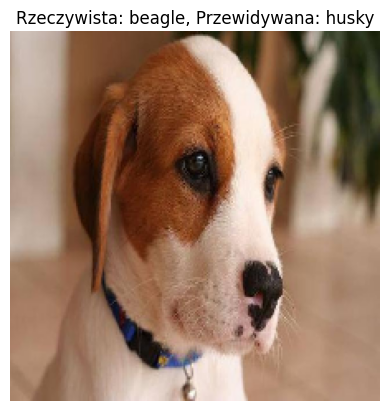

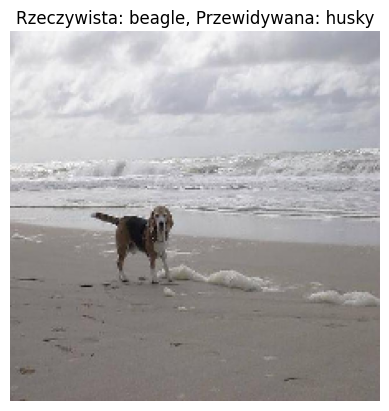

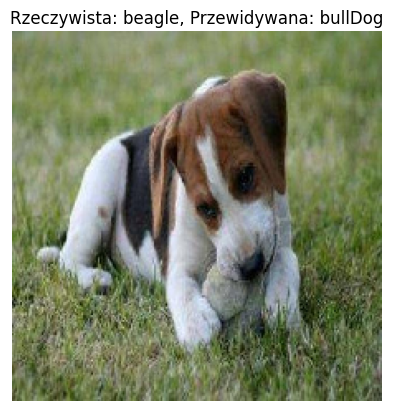

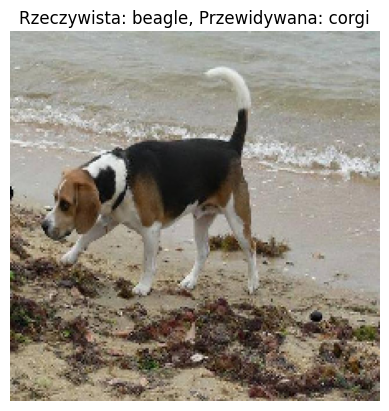

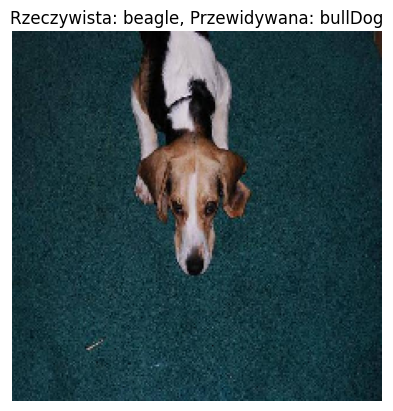

In [78]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# --- Znalezienie błędnych predykcji dla modelu VGG16 ---
errors_indices_vgg = np.where(predictions_valid_vgg != true_labels_valid_vgg)[0]
print(f"Liczba błędów w modelu VGG16: {len(errors_indices_vgg)}")

# Pobranie nazw plików dla błędnych predykcji
filenames_vgg = np.array(valid_generator_vgg.filenames)
error_filenames_vgg = filenames_vgg[errors_indices_vgg]

# Ścieżka do folderu walidacyjnego
valid_dir_vgg = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/valid/images"

# Wyświetlanie błędnych obrazów z informacją o rzeczywistej i przewidywanej klasie
for idx in errors_indices_vgg[:5]:  # Wyświetl pierwsze 5 błędnych próbek
    img_path_vgg = f"{valid_dir_vgg}/{filenames_vgg[idx]}"
    img_vgg = load_img(img_path_vgg, target_size=(224, 224))
    img_array_vgg = img_to_array(img_vgg) / 255.0

    # Pobierz rzeczywistą i przewidywaną klasę
    true_label_vgg = labels_valid_vgg[true_labels_valid_vgg[idx]]
    predicted_label_vgg = labels_valid_vgg[predictions_valid_vgg[idx]]

    # Wyświetl obraz z informacją o klasach
    plt.imshow(img_array_vgg)
    plt.title(f"Rzeczywista: {true_label_vgg}, Przewidywana: {predicted_label_vgg}")
    plt.axis('off')
    plt.show()


### VGG16 - ulepszony

Found 880 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.1462 - loss: 1.9250 - val_accuracy: 0.2789 - val_loss: 1.7517 - learning_rate: 1.0000e-05
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.1791 - loss: 1.8510 - val_accuracy: 0.2709 - val_loss: 1.6965 - learning_rate: 1.0000e-05
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.2562 - loss: 1.7583 - val_accuracy: 0.3187 - val_loss: 1.6393 - learning_rate: 1.0000e-05
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.2756 - loss: 1.7442 - val_accuracy: 0.4064 - val_loss: 1.5516 - learning_rate: 1.0000e-05
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3106 - loss: 1.6405 - val_accuracy: 0.4661 - val_loss: 1.4425 - learning_rate: 1.0000e-05
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3948 - loss: 1.5193 - val_accuracy: 0.5498 - val_loss: 1.2986 - learning_rate: 1.0000e-05
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.4534 - loss:

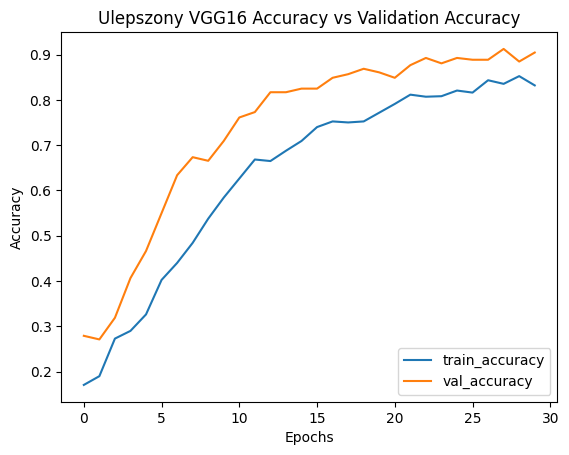

Ulepszony model VGG16 został zapisany do pliku 'vgg16_dog_breeds_improved.h5'.


In [70]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- Funkcja do tworzenia generatorów dla ulepszonego VGG16 ---
def create_generators_vgg_improved(train_path, valid_path, target_size=(224, 224), batch_size=32):
    """
    Tworzy generatory danych dedykowane dla ulepszonego modelu VGG16.
    """
    # Generator treningowy z bardziej zaawansowaną augmentacją
    train_datagen_vgg_improved = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,  # Zwiększenie zakresu rotacji
        width_shift_range=0.3,  # Większe przesunięcia w poziomie
        height_shift_range=0.3,  # Większe przesunięcia w pionie
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator_vgg_improved = train_datagen_vgg_improved.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse'
    )

    # Generator walidacyjny (tylko normalizacja)
    valid_datagen_vgg_improved = ImageDataGenerator(rescale=1./255)

    valid_generator_vgg_improved = valid_datagen_vgg_improved.flow_from_directory(
        valid_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )

    return train_generator_vgg_improved, valid_generator_vgg_improved


# --- Ścieżki do zbioru treningowego i walidacyjnego ---
train_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/train/images"
valid_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/valid/images"

# Tworzenie generatorów danych dla ulepszonego VGG16
train_generator_vgg_improved, valid_generator_vgg_improved = create_generators_vgg_improved(
    train_path, 
    valid_path, 
    target_size=(224, 224), 
    batch_size=32
)

# --- Budowanie ulepszonego modelu VGG16 ---
base_model_vgg_improved = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Odblokowanie ostatnich warstw VGG16 (dla fine-tuning)
for layer in base_model_vgg_improved.layers[:-4]:  # Zamrażamy wszystkie warstwy poza ostatnimi 4
    layer.trainable = False

model_vgg_improved = Sequential([
    base_model_vgg_improved,  # Przedtrenowany VGG16 jako ekstraktor cech
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Więcej neuronów w ukrytej warstwie
    Dropout(0.4),  # Większy dropout
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 klas wyjściowych
])

# Kompilacja modelu z bardzo małym learning rate
model_vgg_improved.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Dodanie callbacka do redukcji learning rate ---
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Zmniejsz learning rate o połowę
    patience=3,  # Po 3 epokach bez poprawy
    verbose=1
)

# --- Trening ulepszonego modelu ---
history_vgg_improved = model_vgg_improved.fit(
    train_generator_vgg_improved,
    epochs=30,  # Dłuższy trening
    validation_data=valid_generator_vgg_improved,
    callbacks=[reduce_lr]
)

# --- Wizualizacja wyników treningu ---
plt.plot(history_vgg_improved.history['accuracy'], label='train_accuracy')
plt.plot(history_vgg_improved.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Ulepszony VGG16 Accuracy vs Validation Accuracy')
plt.show()

# --- Zapis modelu ---
model_vgg_improved.save("vgg16_dog_breeds_improved.h5")
print("Ulepszony model VGG16 został zapisany do pliku 'vgg16_dog_breeds_improved.h5'.")


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


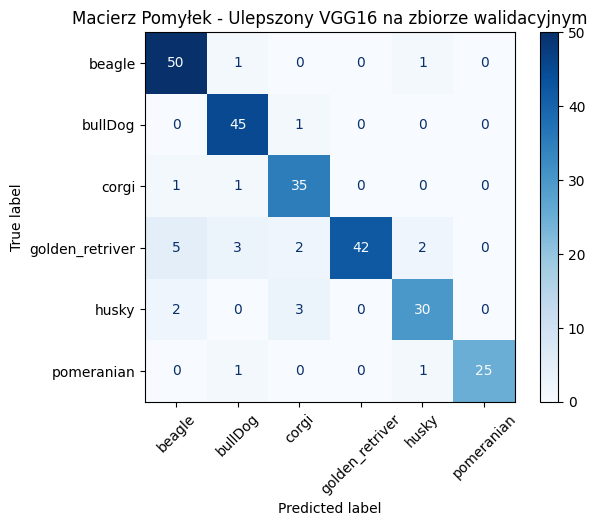

Dokładność ulepszonego modelu VGG16 na zbiorze walidacyjnym: 90.44%


In [71]:

# --- Obliczenie dokładności i macierzy pomyłek na walidacyjnym ---
valid_generator_vgg_improved.reset()
predictions_valid_vgg_improved = np.argmax(model_vgg_improved.predict(valid_generator_vgg_improved, verbose=1), axis=-1)
true_labels_valid_vgg_improved = valid_generator_vgg_improved.classes

cm_valid_vgg_improved = confusion_matrix(true_labels_valid_vgg_improved, predictions_valid_vgg_improved)
labels_valid_vgg_improved = list(valid_generator_vgg_improved.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm_valid_vgg_improved, display_labels=labels_valid_vgg_improved)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - Ulepszony VGG16 na zbiorze walidacyjnym")
plt.show()

# --- Obliczanie dokładności ---
accuracy_valid_vgg_improved = np.sum(predictions_valid_vgg_improved == true_labels_valid_vgg_improved) / len(true_labels_valid_vgg_improved)
print(f"Dokładność ulepszonego modelu VGG16 na zbiorze walidacyjnym: {accuracy_valid_vgg_improved:.2%}")

In [74]:
# Znajdź indeksy próbek, na których model się pomylił
errors_indices = np.where(predictions_valid_vgg_improved != true_labels_valid_vgg_improved)[0]
print(f"Liczba błędów: {len(errors_indices)}")


Liczba błędów: 24


In [75]:
# Pobierz nazwy plików dla błędnych predykcji
filenames = np.array(valid_generator_vgg_improved.filenames)
error_filenames = filenames[errors_indices]

# Wyświetl błędnie sklasyfikowane pliki
for idx, file in enumerate(error_filenames):
    print(f"Błąd {idx + 1}: {file}")


Błąd 1: beagle\beagle_168_jpg.rf.392cc66754bb34e83fd2844f9465d66f.jpg
Błąd 2: beagle\beagle_220_jpg.rf.3aedf810105636bc34f4e759e1ee512e.jpg
Błąd 3: bullDog\bullDog_68_jpg.rf.839f81e7493e3af96f8cf6394150344c.jpg
Błąd 4: corgi\corgi_121_jpg.rf.f0bded7d122ce31e8c0b427a3af95278.jpg
Błąd 5: corgi\corgi_197_jpg.rf.05012e8403409f649cbf5cdb8cad5871.jpg
Błąd 6: golden_retriver\golden_retriver_122_jpg.rf.d95222e78aff1e7a0aa6ab87d0741105.jpg
Błąd 7: golden_retriver\golden_retriver_144_jpg.rf.6b8762994bed357822c1339751ce3227.jpg
Błąd 8: golden_retriver\golden_retriver_166_jpg.rf.2af9ce79ae443a908945b5730fb00a25.jpg
Błąd 9: golden_retriver\golden_retriver_171_jpg.rf.581fbc136a009319b2e3e8b0326c3672.jpg
Błąd 10: golden_retriver\golden_retriver_200_jpg.rf.89b85ad001cc7bc8fe0763fdce48ab8f.jpg
Błąd 11: golden_retriver\golden_retriver_205_jpg.rf.6b9a330ba7178c01a6961e40faa07381.jpg
Błąd 12: golden_retriver\golden_retriver_216_jpg.rf.8ac4b3e7bb2993c4ae89221ba0df12f4.jpg
Błąd 13: golden_retriver\golden_re

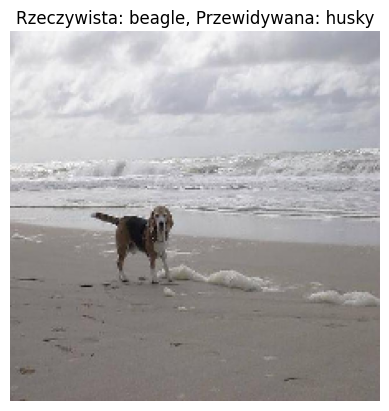

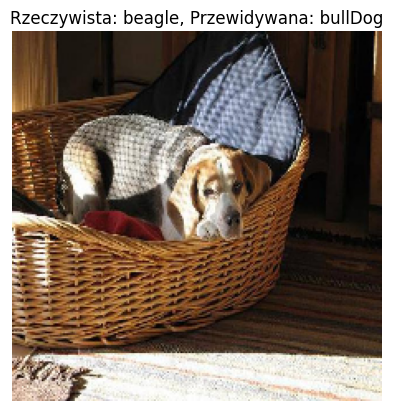

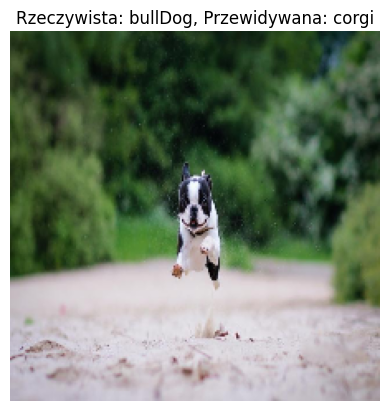

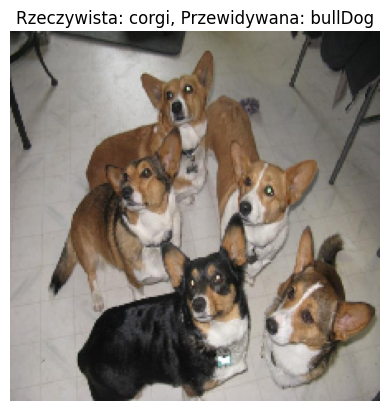

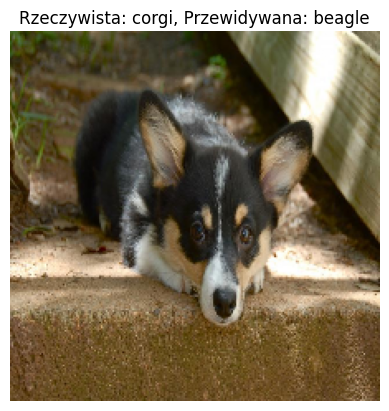

In [77]:
# Wyświetl błędne obrazy z informacją o przewidywanej i rzeczywistej klasie
for idx in errors_indices[:5]:  # Wyświetl pierwsze 5 błędnych próbek
    img_path = f"{valid_dir}/{filenames[idx]}"
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0

    # Pobierz rzeczywistą i przewidywaną klasę
    true_label = labels_valid_vgg_improved[true_labels_valid_vgg_improved[idx]]
    predicted_label = labels_valid_vgg_improved[predictions_valid_vgg_improved[idx]]

    # Wyświetl obraz
    plt.imshow(img_array)
    plt.title(f"Rzeczywista: {true_label}, Przewidywana: {predicted_label}")
    plt.axis('off')
    plt.show()


Found 126 images belonging to 6 classes.


c:\Users\Jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Ulepszony model VGG16 został pomyślnie załadowany (test).
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


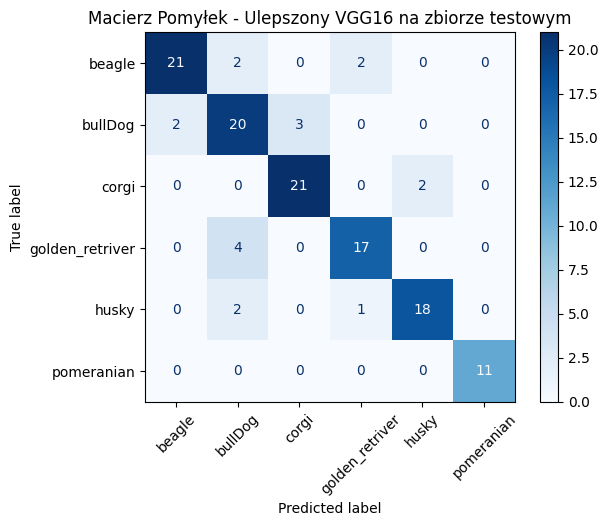

Dokładność ulepszonego modelu VGG16 na zbiorze testowym: 85.71%


In [73]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# --- Ścieżka do zbioru testowego ---
test_images_path = "C:/Users/Jakub/Downloads/6 Dog Breeds.v1i.yolov11/test/images"

# --- Generator testowy ---
test_datagen_vgg_improved = ImageDataGenerator(rescale=1./255)  # Normalizacja
test_generator_vgg_improved = test_datagen_vgg_improved.flow_from_directory(
    test_images_path,
    target_size=(224, 224),  # Rozmiar obrazów dostosowany do VGG16
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # Ważne: wyłącz shuffle, aby zachować kolejność danych
)

# --- Ładowanie zapisanego ulepszonego modelu VGG16 ---
model_vgg_improved_test = load_model("vgg16_dog_breeds_improved.h5")
print("Ulepszony model VGG16 został pomyślnie załadowany (test).")

# --- Przewidywanie etykiet na zbiorze testowym ---
test_generator_vgg_improved.reset()  # Reset generatora, aby rozpocząć od początku
predictions_vgg_improved = np.argmax(model_vgg_improved_test.predict(test_generator_vgg_improved, verbose=1), axis=-1)

# --- Pobranie prawdziwych etykiet ---
true_labels_vgg_improved = test_generator_vgg_improved.classes

# --- Obliczenie macierzy pomyłek ---
cm_vgg_improved = confusion_matrix(true_labels_vgg_improved, predictions_vgg_improved)
labels_vgg_improved = list(test_generator_vgg_improved.class_indices.keys())

# --- Wyświetlenie macierzy pomyłek ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vgg_improved, display_labels=labels_vgg_improved)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Macierz Pomyłek - Ulepszony VGG16 na zbiorze testowym")
plt.show()

# --- Obliczanie dokładności na zbiorze testowym ---
accuracy_vgg_improved = np.sum(predictions_vgg_improved == true_labels_vgg_improved) / len(true_labels_vgg_improved)
print(f"Dokładność ulepszonego modelu VGG16 na zbiorze testowym: {accuracy_vgg_improved:.2%}")
